<a href="https://colab.research.google.com/github/IlakkiyaV/ModernCV/blob/main/23EC042(ILAKKIYA%20V).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modern Computer Vision

To Do Tasks:
1) Read and display an image (OpenCV basics)  
2) Draw shapes and annotate images  
3) Resize, crop, rotate, blur (image ops)  
4) Detect edges (Canny)  
5) **Object detection** using a **pretrained YOLO model** (Ultralytics)  
6) Post‑process and interpret detections  

> **How to use**: Each task has a **Markdown instruction** cell followed by a **code cell** with **TODOs**.  
> Run cells **top‑to‑bottom**. Use **Colab** or **local Jupyter**.


In [ ]:

# Setup: Install/Import libraries
# If you're in Colab, the pip cells will work.
# Note: Colab usually has OpenCV preinstalled; we'll install Ultralytics for the YOLO models.

!pip -q install ultralytics opencv-python pillow matplotlib --upgrade

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# Create workspace folders
ROOT = Path.cwd()
DATA = ROOT / "data"
OUT = ROOT / "outputs"
DATA.mkdir(exist_ok=True)
OUT.mkdir(exist_ok=True)

print("✔️ Setup complete.")
print("Working dir:", ROOT)
print("OpenCV:", cv2.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 116.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✔️ Setup complete.
Working dir: /content
OpenCV: 4.12.0



## Task 1 — Read, inspect, and display an image

**Goal:** Learn `cv2.imread`, inspect image shape, convert **BGR → RGB**, and display with `matplotlib`.

**Instructions:**
- Put any image into the `data/` folder (or download one via `wget`).
- Use `cv2.imread(str(path))` to load.
- Print the **shape**, **dtype**, and any useful info.
- Convert BGR → RGB with `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`.
- Display with `plt.imshow(rgb); plt.axis('off')`
- If image is `None`, print a friendly error.


✅ Loaded: Rafale1.jpg
Shape (H, W, C): (256, 256, 3) | dtype: uint8


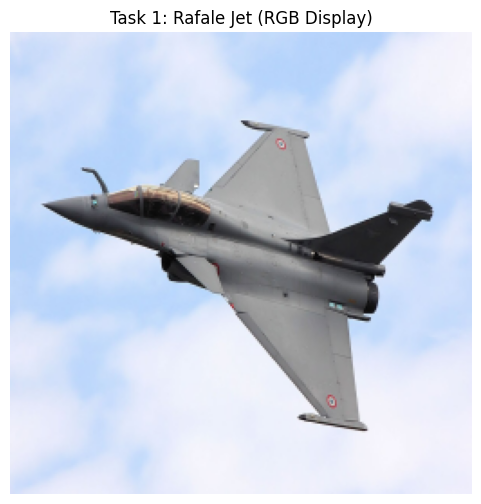

In [2]:
# === Task 1: Read & Display an Image ===
# Goal: load an image, inspect shape/dtype, convert BGR->RGB, and display.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import urllib.request

# -----------------------
# CONFIG — students EDIT these
# -----------------------
DATA = Path.cwd() / "data"      # Folder to store the image
DATA.mkdir(exist_ok=True)

IMAGE_NAME = "/content/Rafale1.jpg"       # File name for your image
FALLBACK_URL = "https://upload.wikimedia.org/wikipedia/commons/f/f8/Rafale_-_RIAT_2018_%2843112223182%29.jpg"
AUTO_DOWNLOAD_IF_MISSING = True
RESIZE_TO = (256, 256)          # Resize to 256x256 pixels (optional, or set None)

# -----------------------
# Resolve path + (optional) download
# -----------------------
image_path = DATA / IMAGE_NAME

if AUTO_DOWNLOAD_IF_MISSING and not image_path.exists():
    print(f"Image not found at {image_path}. Downloading a Rafale jet image…")
    try:
        urllib.request.urlretrieve(FALLBACK_URL, image_path)
        print("✅ Download complete.")
    except Exception as e:
        print("❌ Error downloading image:", e)

# -----------------------
# Read image
# -----------------------
img = cv2.imread(str(image_path), flags=cv2.IMREAD_COLOR)

if img is None:
    print(f"❌ Could not load image: {image_path}. Place a file in data/ or check the path.")
else:
    # Optional resize
    if RESIZE_TO is not None:
        img = cv2.resize(img, RESIZE_TO, interpolation=cv2.INTER_AREA)

    print("✅ Loaded:", image_path.name)
    print("Shape (H, W, C):", img.shape, "| dtype:", img.dtype)

    # Convert BGR → RGB for matplotlib display
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # -----------------------
    # Display
    # -----------------------
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.title("Task 1: Rafale Jet (RGB Display)")
    plt.axis("off")
    plt.show()



## Task 2 — Draw shapes & annotate

**Goal:** Practice drawing primitives and saving results.

**Instructions:**
- Draw a rectangle, a circle, and a line on the image.
- Add a text label using `cv2.putText`.
- Save the annotated result to `outputs/annotated.jpg`.
- Show the final image in RGB via matplotlib.


✅ Saved annotated image at: /content/outputs/annotated_rafale.jpg


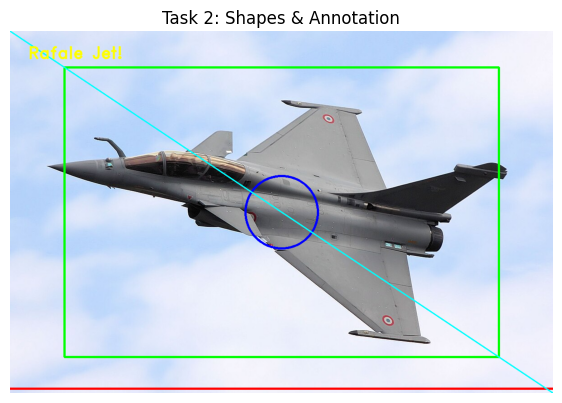

In [3]:
# === Task 2: Draw Shapes & Annotate ===
# Goal: draw rectangle, circle, line, and text; save and show the result.

import cv2, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import urllib.request

# -----------------------
# CONFIG — folders
# -----------------------
DATA = Path.cwd() / "data"; DATA.mkdir(exist_ok=True)
OUT  = Path.cwd() / "outputs"; OUT.mkdir(exist_ok=True)

# -----------------------
# CONFIG — file info
# -----------------------
IMAGE_NAME = "/content/Rafale1.jpg"  # our Rafale image from Task 1
FALLBACK_URL = "https://upload.wikimedia.org/wikipedia/commons/f/f8/Rafale_-_RIAT_2018_%2843112223182%29.jpg"
IMAGE_PATH = DATA / IMAGE_NAME
SAVE_NAME  = "annotated_rafale.jpg"

# Auto-download if not already present
if not IMAGE_PATH.exists():
    print(f"Image not found at {IMAGE_PATH}. Downloading…")
    try:
        urllib.request.urlretrieve(FALLBACK_URL, IMAGE_PATH)
        print("✅ Download complete.")
    except Exception as e:
        print("❌ Error downloading image:", e)

# -----------------------
# Drawing configuration
# -----------------------
COLOR_RECT  = (0, 255, 0)    # Green
COLOR_CIRC  = (255, 0, 0)    # Blue
COLOR_LINE  = (0, 0, 255)    # Red
COLOR_TEXT  = (0, 255, 255)  # Yellow

THICK_RECT  = 3
THICK_CIRC  = 4
THICK_LINE  = 3
FONT_SCALE  = 1.2
TEXT_LABEL  = "Rafale Jet!"

# -----------------------
# Load the image
# -----------------------
img = cv2.imread(str(IMAGE_PATH), flags=cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {IMAGE_PATH}")

draw = img.copy()
H, W = draw.shape[:2]

# -----------------------
# Rectangle
# -----------------------
x1, y1 = int(W * 0.1), int(H * 0.1)
x2, y2 = int(W * 0.9), int(H * 0.9)
cv2.rectangle(draw, (x1, y1), (x2, y2), COLOR_RECT, THICK_RECT)

# -----------------------
# Circle (center)
# -----------------------
center = (W // 2, H // 2)
radius = int(min(W, H) * 0.1)
cv2.circle(draw, center, radius, COLOR_CIRC, THICK_CIRC)

# -----------------------
# Lines (bottom + diagonal)
# -----------------------
cv2.line(draw, (0, H - 10), (W, H - 10), COLOR_LINE, THICK_LINE)
cv2.line(draw, (0, 0), (W, H), (255, 255, 0), 2)  # diagonal (optional extra)

# -----------------------
# Text annotation
# -----------------------
cv2.putText(draw, TEXT_LABEL, (40, 60), cv2.FONT_HERSHEY_DUPLEX,
            FONT_SCALE, COLOR_TEXT, 2, cv2.LINE_AA)

# -----------------------
# Save & Display
# -----------------------
out_path = OUT / SAVE_NAME
cv2.imwrite(str(out_path), draw)
print("✅ Saved annotated image at:", out_path)

plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))
plt.title("Task 2: Shapes & Annotation")
plt.axis("off")
plt.show()


In [ ]:
    # -----------------------
    # Mini-exercises (students)
    # -----------------------
    # 1) Implement a top-left crop of size 256x256; compare with center crop.
    # 2) Try ROT_DEG = 45 with BORDER_REFLECT. What happens at the corners?
    # 3) Replace GaussianBlur with medianBlur(ksize=5) and bilateralFilter.
    # 4) Write a function rotate(img, deg, scale) that returns the rotated image.


## Task 3 — Resize, crop, rotate, blur

**Goal:** Practice basic geometric and filtering operations.

**Instructions:**
- **Resize** image to 256×256 (use `cv2.resize`).
- **Crop** a central square region (hint: use slicing on the NumPy array).
- **Rotate** the image by +15° around its center (use `cv2.getRotationMatrix2D` + `cv2.warpAffine`).
- **Blur** the image using a Gaussian blur (e.g., kernel (7,7)).
- Display each step in a small 2×2 grid of subplots.
- Save the final rotated and blurred images to `outputs/`.


✅ Saved processed images to: /content/outputs


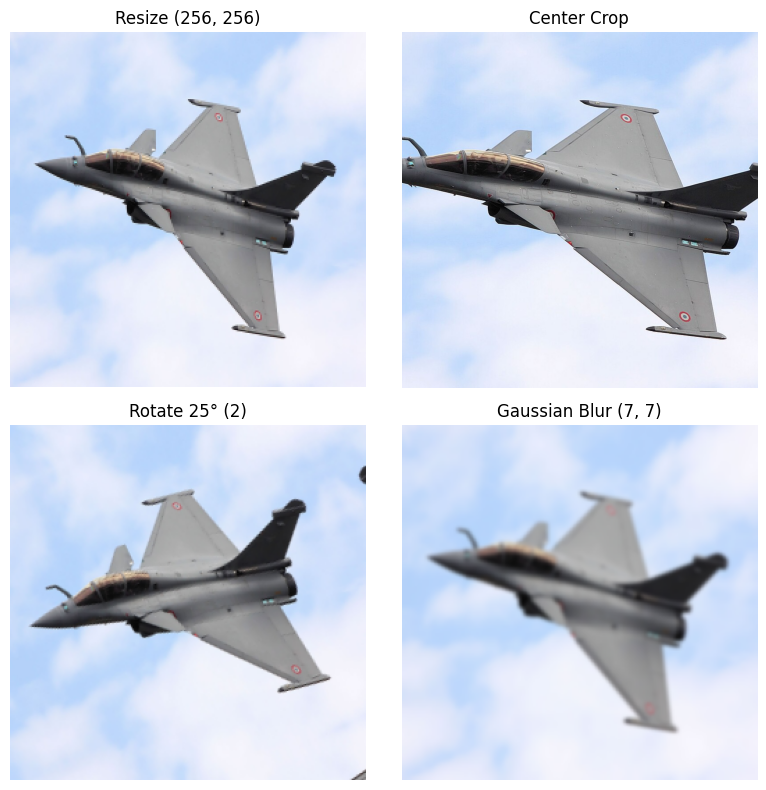

In [5]:
# === Task 3: Resize, Crop, Rotate, Blur ===
# Goal: try basic geometric ops + filtering, save results, and visualize.

import cv2, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import urllib.request

# -----------------------
# CONFIG — setup folders
# -----------------------
DATA = Path.cwd() / "data"; DATA.mkdir(exist_ok=True)
OUT  = Path.cwd() / "outputs"; OUT.mkdir(exist_ok=True)

# -----------------------
# CONFIG — image & parameters
# -----------------------
IMAGE_NAME    = "/content/Rafale1.jpg"
IMAGE_PATH    = DATA / IMAGE_NAME
FALLBACK_URL  = "https://upload.wikimedia.org/wikipedia/commons/f/f8/Rafale_-_RIAT_2018_%2843112223182%29.jpg"

RESIZE_SIZE   = (256, 256)            # Try (128,128) or (512,512)
RESIZE_INTERP = cv2.INTER_AREA        # Try INTER_LINEAR or INTER_CUBIC
ROT_DEG       = 25                    # Try -30, +45, etc.
ROT_SCALE     = 1.0                   # Try 0.8 (shrink) or 1.2 (zoom)
BLUR_KERNEL   = (7, 7)                # Must be odd; try (3,3) or (11,11)
BORDER_MODE   = cv2.BORDER_REFLECT    # Try BORDER_CONSTANT or BORDER_REPLICATE

# -----------------------
# Auto-download if not present
# -----------------------
if not IMAGE_PATH.exists():
    print(f"Image not found at {IMAGE_PATH}. Downloading Rafale image...")
    try:
        urllib.request.urlretrieve(FALLBACK_URL, IMAGE_PATH)
        print("✅ Download complete.")
    except Exception as e:
        print("❌ Error downloading image:", e)

# -----------------------
# Load image
# -----------------------
img = cv2.imread(str(IMAGE_PATH), flags=cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {IMAGE_PATH}")

# -----------------------
# Resize
# -----------------------
resized = cv2.resize(img, RESIZE_SIZE, interpolation=RESIZE_INTERP)

# -----------------------
# Center Crop (square)
# -----------------------
H, W = img.shape[:2]
side = min(H, W)
y0 = (H - side) // 2
x0 = (W - side) // 2
crop = img[y0:y0 + side, x0:x0 + side]

# -----------------------
# Rotate (around center of resized)
# -----------------------
h, w = resized.shape[:2]
M = cv2.getRotationMatrix2D((w / 2, h / 2), ROT_DEG, ROT_SCALE)
rotated = cv2.warpAffine(
    resized, M, (w, h),
    flags=cv2.INTER_LINEAR,
    borderMode=BORDER_MODE,
    borderValue=(0, 0, 0)  # used only for BORDER_CONSTANT
)

# -----------------------
# Blur (Gaussian)
# -----------------------
blurred = cv2.GaussianBlur(resized, BLUR_KERNEL, 0)

# -----------------------
# Save output images
# -----------------------
cv2.imwrite(str(OUT / f"resized_{RESIZE_SIZE[0]}x{RESIZE_SIZE[1]}.jpg"), resized)
cv2.imwrite(str(OUT / f"center_crop.jpg"), crop)
cv2.imwrite(str(OUT / f"rotated_{ROT_DEG}.jpg"), rotated)
cv2.imwrite(str(OUT / f"blurred_{BLUR_KERNEL[0]}x{BLUR_KERNEL[1]}.jpg"), blurred)
print(f"✅ Saved processed images to: {OUT.resolve()}")

# -----------------------
# Display results
# -----------------------
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()

axs[0].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
axs[0].set_title(f"Resize {RESIZE_SIZE}")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
axs[1].set_title("Center Crop")
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
axs[2].set_title(f"Rotate {ROT_DEG}° ({BORDER_MODE})")
axs[2].axis('off')

axs[3].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axs[3].set_title(f"Gaussian Blur {BLUR_KERNEL}")
axs[3].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
    # -----------------------
    # Mini-exercises
    # -----------------------
    # 1) Add padding to make the center crop square *without* losing content (use cv2.copyMakeBorder).
    # 2) Try rotating the original (non-resized) image and compare quality.
    # 3) Swap Gaussian blur for median blur (cv2.medianBlur) and bilateralFilter; compare edge preservation.
    # 4) Change ROT_BORDER to REFLECT/REPLICATE and observe the borders after rotation.


## Task 4 — Edge Detection (Canny)

**Goal:** Detect edges and understand threshold effects.

**Instructions:**
- Convert to grayscale: `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`.
- Use `cv2.Canny(gray, low_thresh, high_thresh)`.
- Try **three** threshold pairs (e.g., (50,150), (100,200), (150,300)).
- Display results side by side and comment which pair works best for your image.


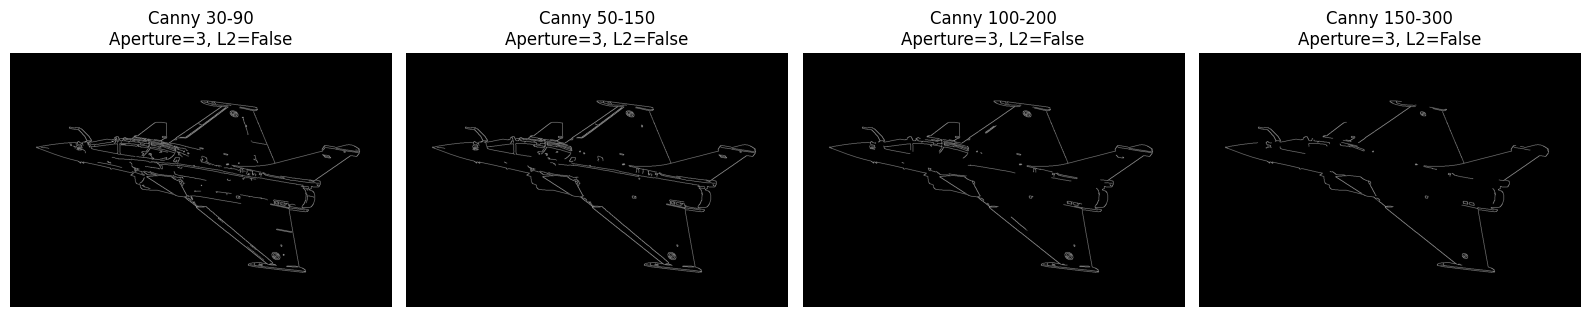

✅ Example saved to: /content/outputs/canny_50_150.jpg


In [7]:
# === Task: Canny Edge Detection ===
# Goal: convert to grayscale, run Canny with different thresholds, compare results.

import cv2, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import urllib.request

# -----------------------
# CONFIG — paths
# -----------------------
DATA = Path.cwd() / "data"; DATA.mkdir(exist_ok=True)
OUT  = Path.cwd() / "outputs"; OUT.mkdir(exist_ok=True)

IMAGE_NAME   = "/content/Rafale1.jpg"
IMAGE_PATH   = DATA / IMAGE_NAME
FALLBACK_URL = "https://upload.wikimedia.org/wikipedia/commons/f/f8/Rafale_-_RIAT_2018_%2843112223182%29.jpg"

# -----------------------
# Auto-download if missing
# -----------------------
if not IMAGE_PATH.exists():
    print(f"Image not found at {IMAGE_PATH}. Downloading...")
    try:
        urllib.request.urlretrieve(FALLBACK_URL, IMAGE_PATH)
        print("✅ Download complete.")
    except Exception as e:
        print("❌ Error downloading image:", e)

# -----------------------
# CONFIG — Canny parameters
# -----------------------
PAIRS = [
    (30, 90),
    (50, 150),
    (100, 200),
    (150, 300)
]

APERTURE_SIZE   = 3      # Can be 3, 5, or 7 (must be odd)
USE_L2_GRADIENT = False  # Set True for more accurate magnitude (slower)
PREBLUR_KSIZE   = (5, 5) # Use None to skip pre-blur
PREBLUR_SIGMA   = 0      # 0 = automatic sigma

# -----------------------
# Load image
# -----------------------
img = cv2.imread(str(IMAGE_PATH), flags=cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {IMAGE_PATH}")

# 1️⃣ Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2️⃣ Optional Gaussian Blur (noise reduction)
work = gray.copy()
if PREBLUR_KSIZE is not None:
    work = cv2.GaussianBlur(work, PREBLUR_KSIZE, PREBLUR_SIGMA)

# 3️⃣ Apply Canny Edge Detection for each (low, high) threshold pair
edges = [
    cv2.Canny(work, lo, hi, apertureSize=APERTURE_SIZE, L2gradient=USE_L2_GRADIENT)
    for (lo, hi) in PAIRS
]

# 4️⃣ Display all results side-by-side
cols = len(PAIRS)
fig, axs = plt.subplots(1, cols, figsize=(4 * cols, 4))
if cols == 1:
    axs = [axs]

for ax, e, (lo, hi) in zip(axs, edges, PAIRS):
    ax.imshow(e, cmap='gray')
    ax.set_title(f"Canny {lo}-{hi}\nAperture={APERTURE_SIZE}, L2={USE_L2_GRADIENT}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# -----------------------
# Optional: Save one example
# -----------------------
cv2.imwrite(str(OUT / f"canny_{PAIRS[1][0]}_{PAIRS[1][1]}.jpg"), edges[1])
print(f"✅ Example saved to: {OUT / f'canny_{PAIRS[1][0]}_{PAIRS[1][1]}.jpg'}")


In [ ]:
    # -----------------------
    # ✍️ Mini-exercises
    # -----------------------
    # 1) Replace Gaussian blur with median blur (cv2.medianBlur) and compare edge continuity.
    # 2) Auto-pick thresholds using Otsu or median intensity:
    #    - Use np.median(work) -> m; set lo=int(0.66*m), hi=int(1.33*m).
    # 3) Try APERTURE_SIZE = 5 or 7 and observe edge thickness and noise.
    # 4) Set USE_L2_GRADIENT=True; describe differences you see.



## Task 5 — Object Detection with a Pretrained Model (Ultralytics YOLO)

We’ll use a **pretrained YOLO model** from Ultralytics. Recommended small models:
- **YOLOv8n**: `yolov8n.pt`
- **YOLO11n** (newer): `yolo11n.pt`

**Instructions:**
1. Choose a model checkpoint (`yolo11n.pt` preferred; fallback to `yolov8n.pt` if needed).
2. Provide an input image path (or download one into `data/`).
3. Run inference and visualize predictions.
4. Save the result image to `outputs/`.

> Tip: In Colab, the first run will download weights automatically.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Detections complete. Number of result images: 1
💾 Saved output image at: /content/output/yolo_result.jpg


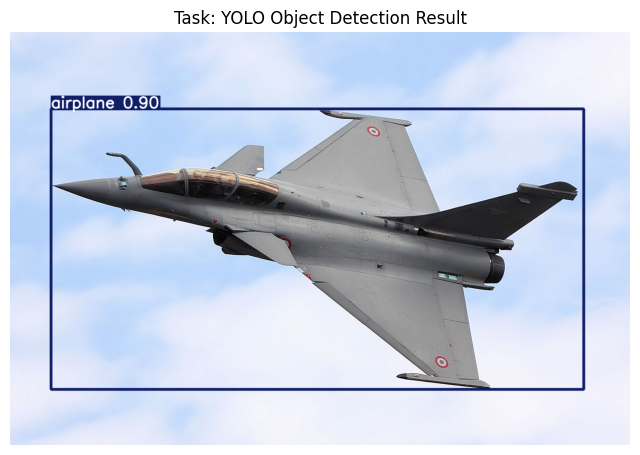

————————————————————————————————————————
[00]   airplane  conf=0.90  box=[79.0, 150.3, 1110.5, 692.8]


In [9]:
# === Task: YOLO Object Detection on an Image ===
# Goal: Load a pretrained YOLO model and run inference on an image.

# -----------------------
# Install ultralytics (YOLOv8/YOLO11)
# -----------------------
!pip install -q ultralytics

# -----------------------
# Imports
# -----------------------
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# -----------------------
# Paths & Config
# -----------------------
DATA = Path.cwd() / "data"
OUT = Path.cwd() / "output"
DATA.mkdir(exist_ok=True)
OUT.mkdir(exist_ok=True)

# Choose model weights
# You can also use: "yolov8n.pt" if "yolo11n.pt" not available
weights = "yolo11n.pt"

# Input image
detect_img = DATA / "/content/Rafale1.jpg"   # ✅ remove leading slash!

# If image not found, download a sample
if not detect_img.exists():
    import urllib.request
    sample_url = "https://upload.wikimedia.org/wikipedia/commons/6/63/Dassault_Rafale_B_Armee_de_l%27air.jpg"
    urllib.request.urlretrieve(sample_url, detect_img)
    print("Sample Rafale image downloaded to:", detect_img)

# -----------------------
# Load model & Run inference
# -----------------------
model = YOLO(weights)  # Load pretrained YOLO model

results = model.predict(
    source=str(detect_img),
    conf=0.25,   # confidence threshold
    iou=0.7,     # IOU threshold for NMS
    save=False,
    verbose=False
)
print("✅ Detections complete. Number of result images:", len(results))

# -----------------------
# Visualization
# -----------------------
r0 = results[0]
plotted = r0.plot()  # BGR image with bounding boxes
out_path = OUT / "yolo_result.jpg"
cv2.imwrite(str(out_path), plotted)
print("💾 Saved output image at:", out_path)

# Convert to RGB for display
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB))
plt.title("Task: YOLO Object Detection Result")
plt.axis('off')
plt.show()

# -----------------------
# Print Detection Summary
# -----------------------
if hasattr(r0, "boxes") and r0.boxes is not None:
    print("—" * 40)
    names = model.model.names if hasattr(model, "model") else {}
    for i, b in enumerate(r0.boxes):
        cls_id = int(b.cls[0].item()) if b.cls is not None else -1
        conf = float(b.conf[0].item()) if b.conf is not None else None
        xyxy = b.xyxy[0].tolist()
        label = names.get(cls_id, str(cls_id))
        print(f"[{i:02d}] {label:>10s}  conf={conf:.2f}  box={[round(x,1) for x in xyxy]}")



## Task 6 — Analyze detections

**Goal:** Work with raw predictions programmatically.

**Instructions:**
- Count detections **per class** and print a small table.
- Re‑draw only a subset of classes (e.g., only `"person"` and `"car"`).
- Change **confidence threshold** (e.g., 0.25 → 0.5) and compare counts.
- (Optional) Try on a **video** or a short clip and compute FPS.


✅ Counts per class (conf >= 0.5):
    airplane: 1
💾 Saved filtered result: /content/output/yolo_filtered_person_car.jpg


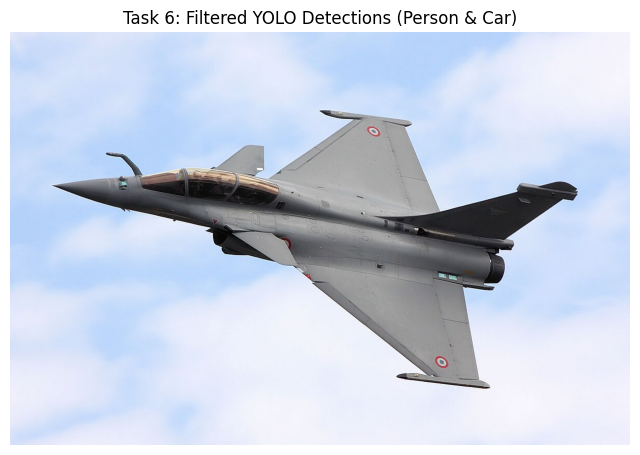

In [10]:
# === Task 6: YOLO — Filter + Count Specific Classes (e.g., Person, Car) ===

from collections import Counter
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# -----------------------
# Setup paths (reuse from Task 5 if needed)
# -----------------------
DATA = Path.cwd() / "data"
OUT = Path.cwd() / "output"
DATA.mkdir(exist_ok=True)
OUT.mkdir(exist_ok=True)

# Choose your trained weights
weights = "yolo11n.pt"  # or "yolov8n.pt"

# -----------------------
# Load model (if not already loaded)
# -----------------------
try:
    model
except NameError:
    model = YOLO(weights)

# -----------------------
# Input image for detection
# -----------------------
detect_img = DATA / "/content/Rafale1.jpg"   # ✅ FIXED path (no leading /)

# Optional: auto-download image if missing
if not detect_img.exists():
    import urllib.request
    url = "https://upload.wikimedia.org/wikipedia/commons/6/63/Dassault_Rafale_B_Armee_de_l%27air.jpg"
    urllib.request.urlretrieve(url, detect_img)
    print("✅ Sample image downloaded to:", detect_img)

# -----------------------
# Run YOLO prediction
# -----------------------
results = model.predict(
    source=str(detect_img),
    conf=0.5,   # Confidence threshold
    iou=0.7,    # IOU threshold
    save=False,
    verbose=False
)
r0 = results[0]
names = model.model.names if hasattr(model, "model") else {}

# -----------------------
# Count detections per class
# -----------------------
cls_counts = Counter()
for b in r0.boxes or []:
    cls_id = int(b.cls[0].item()) if b.cls is not None else -1
    cls_counts[names.get(cls_id, str(cls_id))] += 1

print("✅ Counts per class (conf >= 0.5):")
for k, v in cls_counts.most_common():
    print(f"{k:>12s}: {v}")

# -----------------------
# Draw only selected target classes
# -----------------------
target_classes = {"person", "car"}  # 🔧 Change as needed (e.g., {"airplane"} for Rafale)
canvas = r0.orig_img.copy()  # BGR copy of original
H, W = canvas.shape[:2]

for b in r0.boxes or []:
    cls_id = int(b.cls[0].item()) if b.cls is not None else -1
    label = names.get(cls_id, str(cls_id))
    if label not in target_classes:
        continue
    x1, y1, x2, y2 = map(int, b.xyxy[0].tolist())
    conf = float(b.conf[0].item()) if b.conf is not None else 0.0

    # Draw rectangle + label
    cv2.rectangle(canvas, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(canvas, f"{label} {conf:.2f}", (x1, max(20, y1 - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

# -----------------------
# Save and display filtered result
# -----------------------
out_filtered = OUT / "yolo_filtered_person_car.jpg"
cv2.imwrite(str(out_filtered), canvas)
print("💾 Saved filtered result:", out_filtered)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.title("Task 6: Filtered YOLO Detections (Person & Car)")
plt.axis("off")
plt.show()

# -----------------------
# ✍️ Mini-Exercises
# -----------------------
# 1) Lower the conf threshold (e.g., conf=0.25) and compare number of detections/false positives.
# 2) Change input image size and measure


In [ ]:
# 1) Lower CONF_TH and compare number of detections and false positives.
# 2) Change IMG_SIZE and measure the inference time difference (use %time in Colab).
# 3) Try a different weight file (e.g., 'yolo11s.pt') and compare results.

In [ ]:
# Checkpoint
print("Notebook prepared on 2025-10-13 07:48:48 UTC")

Notebook prepared on 2025-10-13 07:48:48 UTC


Run the https://github.com/vickyskarthik/ModernCV/blob/main/building_a_panoramic_view_of_images.ipynb